Pre-algoritmo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (No se queda este párrafo)
# Se cargan los datos de la matriz inicial de un archivo Excel.
# Lee el archivo Excel y devuelve un DataFrame de pandas.
# Matriz definida previamente con 5 filas (países) y 15 columnas (productos). 
# df = pd.read_excel('datos.xlsx', header=None)
# Convierte el DataFrame en un array de NumPy, formato matricial.
# M = df.to_numpy()


# Se genera una matriz aleatoria.
# Se evita la reproducibilidad (datos iniciales distintos cada vez que se ejecute):
np.random.seed()
# Tamaño de la matriz inicial.
c = 5 # Número de países/filas.
p = 5 # Número de productos/columnas.
peso = 2 # Matriz con valores aleatorios entre 0 y peso-1.

M = np.random.randint(peso, size=(c, p))

# Si, al final, se quiere representar ln(F), logaritmo = 1, si no, logaritmo = 0.
logaritmo = 1

# (No se queda este párrafo)
#print("Número de países: {}".format(c))
#print("Número de productos: {}".format(p))

# Notación
# Fg: Vector Competitividad no normalizada de los países.
# Qg: Vector Complejidad no normalizada de los productos.
# F: Vector Competitividad normalizada de los país.






In [4]:
# Condiciones iniciales Fg y Qg = 1 para todo c y p.
# La condición implica que F y Q iniciales (normalizadas) son 1.
F = np.random.rand(c)  # F = 1 para todo c
Q = np.random.rand(p)  # Q = 1 para todo p

# Definimos el número de iteraciones
n = 100

for i in range(n):
    # 1) Cálculo de Fg en la iteración n:
    Fg = M.dot(Q)  #  donde Fg[c] = \sum_p M_{c,p} * Q[p]

    # 2) Cálculo de Qg en la iteración n:
    # vector 1/F
    invF = 1.0 / F
    # Para cada p, sum_c M_{c,p} * (1/F[c]). Usamos la multiplicación de matriz traspuesta y hayamos 1/Q[p].
    invQ = M.T.dot(invF)
    Qg = 1.0 / invQ  # donde Qg[p] = 1 / \sum_c ( M_{c,p} / F_c^{(n-1)} )

    # 3) Normalización de F_c^(n) y Q_p^(n) y actualización de F y Q:
    F = Fg / np.mean(Fg)
    Q = Qg / np.mean(Qg)
    # Almacenar los valores de F y Q en cada iteración para su posterior análisis/representación.
    if i == 0:
        F_valores = np.zeros((n, c))
        Q_valores = np.zeros((n, p))
    F_valores[i, :] = F
    Q_valores[i, :] = Q

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8744\2536743722.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


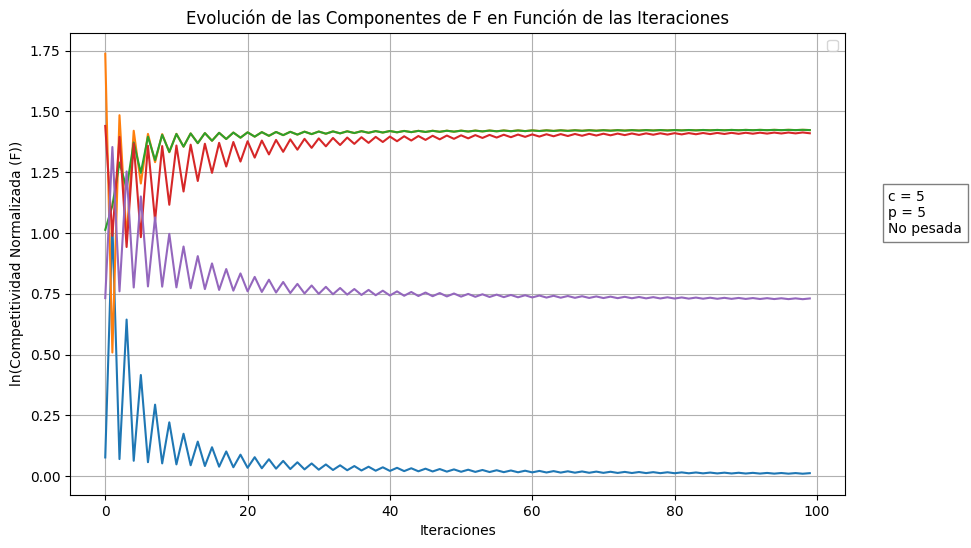

Matriz M:
[[0 0 0 0 1]
 [1 1 0 1 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [1 1 0 0 1]]

F (después de 100 iteraciones):
[0.01288613 1.42308203 1.42308203 1.40996329 0.73098652]

Q (después de 100 iteraciones):
[0.83748966 0.83748966 1.6503937  1.6503937  0.02423328]


In [5]:
# Graficar la evolución de las componentes de F en función de las iteraciones
plt.figure(figsize=(10, 6))
for j in range(c):
    plt.plot(range(n), F_valores[:, j])
plt.xlabel('Iteraciones')
# ylabel. Si se quiere representar ln(F), se cambia el título del eje y.
if logaritmo == 1:
    plt.ylabel('ln(Competitividad Normalizada (F))')
else:
    plt.ylabel('Competitividad Normalizada (F)')
plt.title('Evolución de las Componentes de F en Función de las Iteraciones')
# Leyenda con el tipo de M utilizada.
if peso == 2:
    plt.text(110, logaritmo, f"c = {c}\np = {p}\nNo pesada", bbox=dict(facecolor="white", alpha=0.5))
else:
    plt.text(110, logaritmo, f"c = {c}\np = {p}\nPesada", bbox=dict(facecolor="white", alpha=0.5))
plt.legend()
plt.grid(True)
plt.show()

# (No se queda este párrafo)
# Exportamos los datos a Excel
# df = pd.DataFrame(F)
# df.to_excel('Resultados.xlsx', sheet_name='Países', index=False)
# df = pd.DataFrame(Q)
# Abre el archivo existente y agrega una nueva hoja
# with pd.ExcelWriter('Resultados.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    # df.to_excel(writer, sheet_name='Productos', index=False)

# Resultados finales
print("Matriz M:")
print(M)
print("\nF (después de {} iteraciones):".format(n))
print(F)
print("\nQ (después de {} iteraciones):".format(n))
print(Q)